# Programming Sheet 1: Bayes Decision Theory (40 P)

### Students: 
* Mattes Ohse   (337356)
* Florian Ebert (391837)
* Rodrigo Alexis Pardo Meza 
* Bertty Contreras Rojas


In [1]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Exercise 1: Gaussian distributions (5+5+5 P)

Using the technique introduced above, we would like to plot a normal Gaussian probability distribution with mean vector $\mu = (0,0)$, and covariance matrix $\Sigma = I$ also known as standard normal distribution. We consider the same discretization as above (i.e. a grid from -4 to 4 using step size 0.1). For two-dimensional input spaces, the standard normal distribution is given by:
$$
p(x,y) = \frac{1}{2\pi}e^{-0.5 (x^2+y^2)}.
$$
This distribution sums to $1$ when integrated over $\mathbb{R}^2$. However, it does not sum to $1$ when summing over the discretized space (i.e. the grid). Instead, we can work with a discretized Gaussian-like distribution:
$$
P(x,y) = \frac1Z e^{-0.5 (x^2+y^2)} \qquad \text{with} \quad Z = \sum_{x,y} e^{-0.5 (x^2+y^2)}
$$
where the sum runs over the whole discretized space.

* **Compute the distribution $P(x,y)$, and plot it.**
* **Compute the conditional distribution $Q(x,y) = P((x,y) | \sqrt{x^2+y^2} \geq 1)$, and plot it.**
* **Marginalize the conditioned distribution $Q(x,y)$ over $y$, and plot the resulting distribution $Q(x)$.**

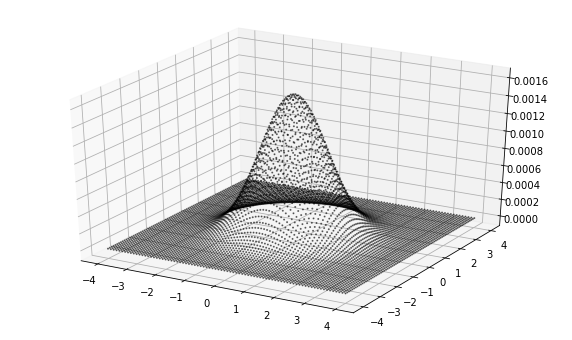

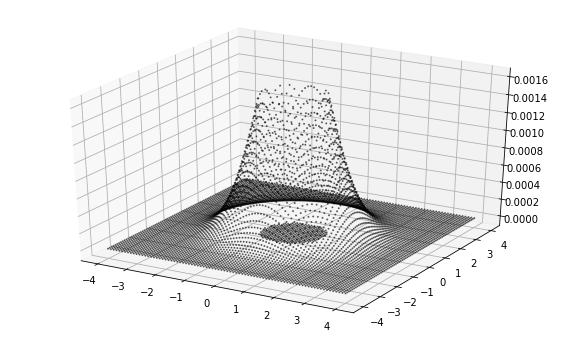

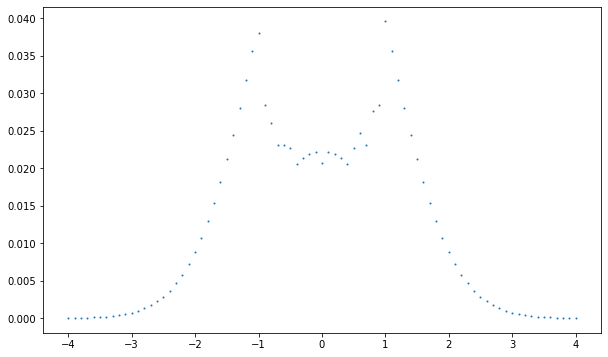

In [6]:
import numpy


def s1a():
    R = numpy.arange(-4,4+1e-9,0.1)
    X1,X2 = numpy.meshgrid(R, R)
    P = numpy.exp(-0.5*(X1**2 + X2**2))
    P = P / P.sum()                     # 1. normalize the distribution
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.scatter(X1, X2, P, s=1, alpha=0.5, color='black')

def s1b():
    R = numpy.arange(-4,4+1e-9,0.1)
    X1,X2 = numpy.meshgrid(R, R)
    P = numpy.exp(-0.5*(X1**2 + X2**2))
    P = P * ((X1**2 + X2**2) >= 1)      # 1. condition the distribution
    P = P / P.sum()                     # 2. normalize the distribution
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.scatter(X1, X2, P, s=1, alpha=0.5, color='black')

def s1c():
    R = numpy.arange(-4,4+1e-9,0.1)
    X1,X2 = numpy.meshgrid(R, R)
    P = numpy.exp(-0.5*(X1**2 + X2**2))
    P = P * ((X1**2 + X2**2) >= 1)      # 1. condition the distribution
    P = P / P.sum()                     # 2. normalize the distribution
    P = P.sum(axis=0)                   # 3. marginalize the distribution
    fig = plt.figure(figsize=(10,6))
    plt.scatter(R, P, s=1, alpha=1.0)
    
s1a()
s1b()
s1c()

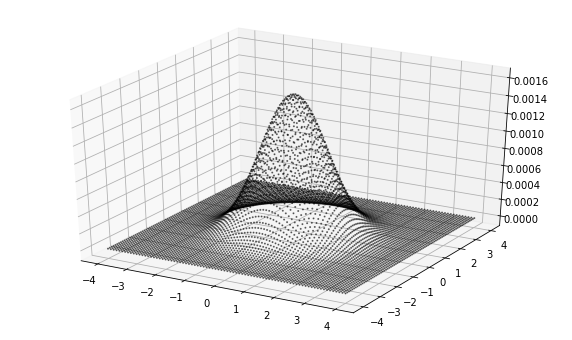

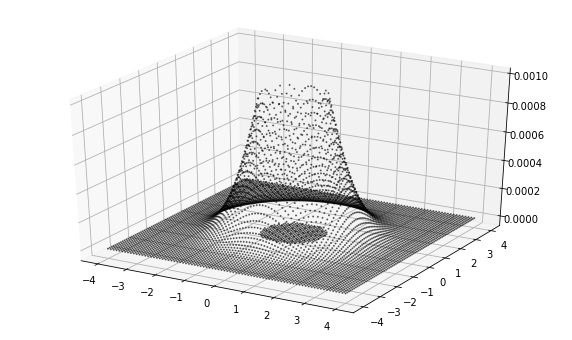

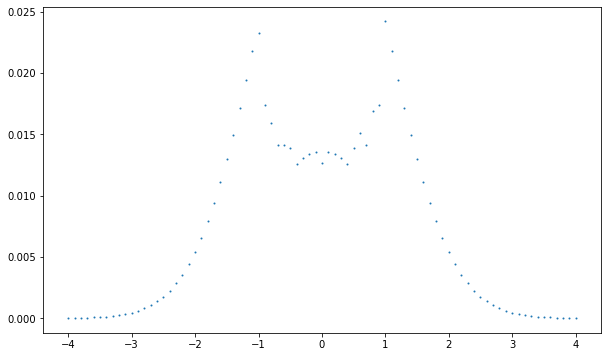

In [7]:
import numpy


def s1a():
    R = numpy.arange(-4,4+1e-9,0.1)
    X1,X2 = numpy.meshgrid(R, R)
    P = numpy.exp(-0.5*(X1**2 + X2**2))
    P = P / P.sum()                     # 1. normalize the distribution
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.scatter(X1, X2, P, s=1, alpha=0.5, color='black')

def s1b():
    R = numpy.arange(-4,4+1e-9,0.1)
    X1,X2 = numpy.meshgrid(R, R)
    P = numpy.exp(-0.5*(X1**2 + X2**2))
    P = P / P.sum()                     # 2. normalize the distribution
    P = P * ((X1**2 + X2**2) >= 1)      # 1. condition the distribution
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.scatter(X1, X2, P, s=1, alpha=0.5, color='black')

def s1c():
    R = numpy.arange(-4,4+1e-9,0.1)
    X1,X2 = numpy.meshgrid(R, R)
    P = numpy.exp(-0.5*(X1**2 + X2**2))
    P = P / P.sum()                     # 2. normalize the distribution
    P = P * ((X1**2 + X2**2) >= 1)      # 1. condition the distribution
    P = P.sum(axis=0)                   # 3. marginalize the distribution
    fig = plt.figure(figsize=(10,6))
    plt.scatter(R, P, s=1, alpha=1.0)
    
s1a()
s1b()
s1c()

In [ ]:
import math
def plot(x_vec, y_vex, func, func2=None):
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.scatter(x_vec, y_vex, func, s=1,alpha=0.5)
    if func2 is not None:
        ax.scatter(x_vec, y_vex, func2, s=1,alpha=0.5)

def plot2D(x_vec, func):
    fig = plt.figure(figsize=(10,6))
    #ax = plt.axes(projection='2d')
    plt.plot(x_vec, func)
        
def mesh(lenght=4):
    R = np.arange(lenght*-1,lenght+1e-9,0.1)
    return np.meshgrid(R,R)

In [ ]:
def prob_P(X, Y):
    exponential =  math.e**(-0.5*(X**2+Y**2))
    p = (1/2*math.pi)* exponential
    Z = np.sum(exponential)
    return (1/Z)*exponential


In [ ]:
# Compute the distribution P(x,y) and plot it
X, Y = mesh()

P = prob_P(X, Y)

plot(X, Y, P)

In [ ]:
#Compute the conditional distribution Q(𝑥,𝑦) and plot it 
X, Y = mesh()

def prob_Q(X, Y):
    
    Q = prob_P(X, Y)

    # reset the peak
    invalid_xy = np.sqrt(X**2+Y**2)<1
    Q[invalid_xy] = 0
    return Q

Q = prob_Q(X, Y)
# plot the result 
plot(X, Y, Q)

In [ ]:
#Marginalize the conditioned distribution 𝑄(𝑥,𝑦) over 𝑦, and plot the resulting distribution 𝑄(𝑥)

X, Y = mesh()

Q = prob_Q(X, Y)

Q_x = Q.sum(axis=1)


plot2D(Y, Q_x)



## Exercise 2: Bayesian Classification (5+5+5 P)

Let the two coordinates x and y be now representated as a two-dimensional vector $\boldsymbol{x}$. We consider two classes $\omega_1$ and $\omega_2$ with data-generating Gaussian distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ of mean vectors
$$\boldsymbol{\mu}_1 = (-0.5,-0.5) \quad \text{and} \quad \boldsymbol{\mu}_2 = (0.5,0.5)$$
respectively, and same covariance matrix
$$\Sigma = \begin{pmatrix}1.0&0\\0&0.5\end{pmatrix}.$$
Classes occur with probability $P(\omega_1) = 0.9$ and $P(\omega_2) = 0.1$. Analysis tells us that in such scenario, the optimal decision boundary between the two classes should be linear. We would like to verify this computationally by applying Bayes decision theory on grid-like discretized distributions.

* **Using the same grid as in Exercise 1, discretize the two data-generating distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ (i.e. create discrete distributions $P(\boldsymbol{x}|\omega_1)$ and $P(\boldsymbol{x}|\omega_2)$ on the grid), and plot them with different colors.**
* **From these distributions, compute the total probability distribution $P(\boldsymbol{x}) = \sum_{c \in \{1,2\}} P(\boldsymbol{x} | \omega_c) \cdot P(\omega_c)$, and plot it.**
* **Compute and plot the class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$, and print the Bayes error rate for the discretized case.**

In [ ]:
mu_1 = np.array([-0.5, -0.5])
mu_2 = np.array([0.5, 0.5])

mu = np.array([mu_1, mu_2])

CoVariance_base = np.array([[1.0, 0], [0, 0.5]])

CoVariance = np.array([CoVariance_base, CoVariance_base])

P_w1=0.9
P_w2=0.1

P_w = np.array([P_w1, P_w2])

In [ ]:
def P_x_Wj(X, Y, j):
    density = P_w.size
    factor_pi = (2*math.pi)**density
    det_covariance = np.linalg.det(CoVariance[j])
    factor = 1 / (math.sqrt(factor_pi * det_covariance))
    
    x_minus_mu = np.array([X - mu[j, 0], Y - mu[j, 1]])
    transpose = x_minus_mu.transpose(0, 1, 2)

    inverse_covariance = np.linalg.inv(CoVariance[j])

    matrix_result = np.empty([transpose.shape[1], transpose.shape[2]])
    for index_i in range(0, transpose.shape[1]):
        for index_j in range(0, transpose.shape[2]):
            first_mult = np.matmul(transpose[:,index_i,index_j], inverse_covariance)
            second_mult = np.matmul(first_mult, x_minus_mu[:,index_i,index_j])
            
            matrix_result[index_i, index_j] = -(1/2)* second_mult
            
    return factor * math.e ** matrix_result

In [ ]:
X, Y = mesh()

P_x_W1 = P_x_Wj(X, Y, 0)
P_x_W2 = P_x_Wj(X, Y, 1)

plot(X, Y, P_x_W1, P_x_W2)

In [ ]:
def P_x(X, Y, size=2):
    sumatoria = np.zeros(X.shape)
    for j in range(0, size):
        sumatoria = sumatoria + P_x_Wj(X, Y, j)*P_w[j]
    return sumatoria

In [ ]:
X, Y = mesh()

p_x = P_x(X, Y)    
    
    
plot(X, Y, p_x)

In [ ]:
def P_wj_x(X, Y, j):
    px = P_x(X, Y)
    return (P_x_Wj(X, Y, j)*P_w[j])/px 

In [ ]:
def bayes_error_rate(X, Y):
    P_Wj1_x = P_wj_x(X, Y, 0)
    P_Wj2_x = P_wj_x(X, Y, 1)
    px = P_x(X, Y)
    minimum = np.minimum(P_Wj1_x, P_Wj2_x)
    minimum_times_Px = minimum * px

    return np.sum(minimum_times_Px)/100


In [ ]:
X, Y = mesh()

px = P_x(X, Y)

P_Wj1_x = P_wj_x(X, Y, 0)

P_Wj2_x = P_wj_x(X, Y, 1)   

plot(X, Y, P_Wj1_x, P_Wj2_x)

#####==========

print("Bayes Error Rate :"+str(bayes_error_rate(X, Y)))







## Exercise 3: Reducing the Variance (5+5 P)

Suppose that the data generating distribution for the second class changes to produce samples much closer to the mean. This variance reduction for the second class is implemented by keeping the first covariance the same (i.e. $\Sigma_1 = \Sigma$) and dividing the second covariance matrix by 4 (i.e. $\Sigma_2 = \Sigma/4$). For this new set of parameters, we can perform the same analysis as in Exercise 2.

* **Plot the new class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$ associated to the new covariance matrices, and print the new Bayes error rate.**

In [ ]:
CoVariance = np.array([CoVariance_base, CoVariance_base/4])

In [ ]:
X, Y = mesh()

px = P_x(X, Y)

P_Wj1_x = P_wj_x(X, Y, 0)

P_Wj2_x = P_wj_x(X, Y, 1)   

plot(X, Y, P_Wj1_x, P_Wj2_x)

#####==========

print("Bayes Error Rate :"+str(bayes_error_rate(X, Y)))





Intuition tells us that by variance reduction and resulting concentration of generated data for class 2 in a smaller region of the input space, it should be easier to predict class 2 with certainty at this location. Paradoxally, in this new "dense" setting, we observe that class 2 does not reach full certainty anywhere in the input space, whereas it did in the previous exercise.

* **Explain this paradox.**

As the function 2 loses covariance, the dispersion of their observations over the feature space became narrow. thats why the probabilities are concentrated close to the mean point.
However, the function 1 having a bigger covariance shows a bigger elongation of the data distribution, being present even in the space where function 2 concentrates their observations.
Therefore, the patterns of function 2 are always overlaped with patterns of function 1. This prevents function 1 to have a location where the patterns certainly belongs to it. On the other hand, function 1 distribution extends over the entire feature space without another class presence.

The text above can be summarized as follows:

1. Gaussian distribution with different Covariance => Quadratic not linear boundary.
2. Reducing the variance -> higher concentration around mean.
3. W1 still extends over whole input space. => Because observations of W1 appear within the decision boundary part of W2 no full certainty for a decision for W2 is possible.

